# Campus Recruitment Project

### Introduction:

Our Project is on the analysis of a data set consisting of students with their Campus Recruitment record. The students are selected based on certain criteria such as Exam Percentage, Board of education, Degree Specialization, Work Experience, etc.,

This analysis can be applied by Corporate companies in selecting their candidates based on the insights I've drawn in the project. I've used Python language and it's libraries for performing Data cleaning, preprocessing, visualizing and analysing.

### Problem Statement:

The following questions shall be answered during the course of analysis:

~ Which factor influenced a candidate in getting placed?


~ Does percentage matters for one to get placed?


~ To get placed in a company which board should I choose (Central or State board) in 12th?


~ To get placed in a company which board should I choose (Central or State board) in 10th?


~ Who is getting more placements girls or boys?


~ Which degree specialization is much demanded by corporate?


~ Does the degree percentage plays important role in getting good salary?


~ Who is mostly not getting placed?


~ Which stream students are getting more placed and which stream students are mostly not placed?

In [1]:
#importing necessary libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [2]:
#reading the csv file

Placement = pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
#displaying the data

Placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Renaming Columns

In [4]:
Placement.rename( columns = { 'sl_no' : "Serial Number"} , inplace  = True)
Placement.rename( columns = { 'gender' : "Gender"} , inplace  = True)
Placement.rename( columns = { 'ssc_p' : "10th Grade - Percentage"} , inplace  = True)
Placement.rename( columns = { 'ssc_b' : "Board of Education- 10th Grade"} , inplace  = True)
Placement.rename( columns = { 'hsc_p' : "12th Grade - Percentage"} , inplace  = True)
Placement.rename( columns = { 'hsc_b' : "Board of Education- 12th Grade"} , inplace  = True)
Placement.rename( columns = { 'hsc_s' : "Specialization in Higher Secondary Education"} , inplace  = True)
Placement.rename( columns = { 'degree_p' : "Degree Percentage"} , inplace  = True)
Placement.rename( columns = { 'degree_t' : "Under Graduation(Degree type)- Field of degree education"} , inplace  = True)
Placement.rename( columns = { 'workex' : "Work Experience"} , inplace  = True)
Placement.rename( columns = { 'etest_p' : "Employability test percentage"} , inplace  = True)
Placement.rename( columns = { 'specialisation' : "Post Graduation(MBA)- Specialization"} , inplace  = True)
Placement.rename( columns = { 'mba_p' : "MBA percentage"} , inplace  = True)
Placement.rename( columns = { 'status' : "Status of placement"} , inplace  = True)
Placement.rename( columns = { 'salary' : "Salary"} , inplace  = True)

### Details and Data Types of the Dataset

In [5]:
Placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Serial Number                                             215 non-null    int64  
 1   Gender                                                    215 non-null    object 
 2   10th Grade - Percentage                                   215 non-null    float64
 3   Board of Education- 10th Grade                            215 non-null    object 
 4   12th Grade - Percentage                                   215 non-null    float64
 5   Board of Education- 12th Grade                            215 non-null    object 
 6   Specialization in Higher Secondary Education              215 non-null    object 
 7   Degree Percentage                                         215 non-null    float64
 8   Under Graduation(Deg

### Summary

#### Numerical Summary

The average percentage along with min, 25%, 50%, 75%, max percentages of the students of classes 10, 12, UG Degree percentage, Employability test percentage, MBA percentage and salary can be found in the below table.

In [6]:
Placement.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial Number,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
10th Grade - Percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
12th Grade - Percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
Degree Percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
Employability test percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
MBA percentage,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
Salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


#### Categorical Summary

The below table confers the unique values under each column and also the frequency of a top categorical value under the respective column.

In [7]:
Placement.describe(include=[object])

,Gender,Board of Education- 10th Grade,Board of Education- 12th Grade,Specialization in Higher Secondary Education,Under Graduation(Degree type)- Field of degree education,Work Experience,Post Graduation(MBA)- Specialization,Status of placement
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


### Value Counts of categorical variables

In [8]:
Placement['Gender'].value_counts()

M    139
F     76
Name: Gender, dtype: int64

In [9]:
Placement['Board of Education- 10th Grade'].value_counts()

Central    116
Others      99
Name: Board of Education- 10th Grade, dtype: int64

In [10]:
Placement['Board of Education- 12th Grade'].value_counts()

Others     131
Central     84
Name: Board of Education- 12th Grade, dtype: int64

In [11]:
Placement['Specialization in Higher Secondary Education'].value_counts()

Commerce    113
Science      91
Arts         11
Name: Specialization in Higher Secondary Education, dtype: int64

In [12]:
Placement['Under Graduation(Degree type)- Field of degree education'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: Under Graduation(Degree type)- Field of degree education, dtype: int64

In [13]:
Placement['Work Experience'].value_counts()

No     141
Yes     74
Name: Work Experience, dtype: int64

In [14]:
Placement['Post Graduation(MBA)- Specialization'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: Post Graduation(MBA)- Specialization, dtype: int64

In [15]:
Placement['Status of placement'].value_counts()

Placed        148
Not Placed     67
Name: Status of placement, dtype: int64

### Checking Null Values or Missing Values

In [16]:
Placement.isnull().sum()

Serial Number                                                0
Gender                                                       0
10th Grade - Percentage                                      0
Board of Education- 10th Grade                               0
12th Grade - Percentage                                      0
Board of Education- 12th Grade                               0
Specialization in Higher Secondary Education                 0
Degree Percentage                                            0
Under Graduation(Degree type)- Field of degree education     0
Work Experience                                              0
Employability test percentage                                0
Post Graduation(MBA)- Specialization                         0
MBA percentage                                               0
Status of placement                                          0
Salary                                                      67
dtype: int64

### Missing Value Matrix

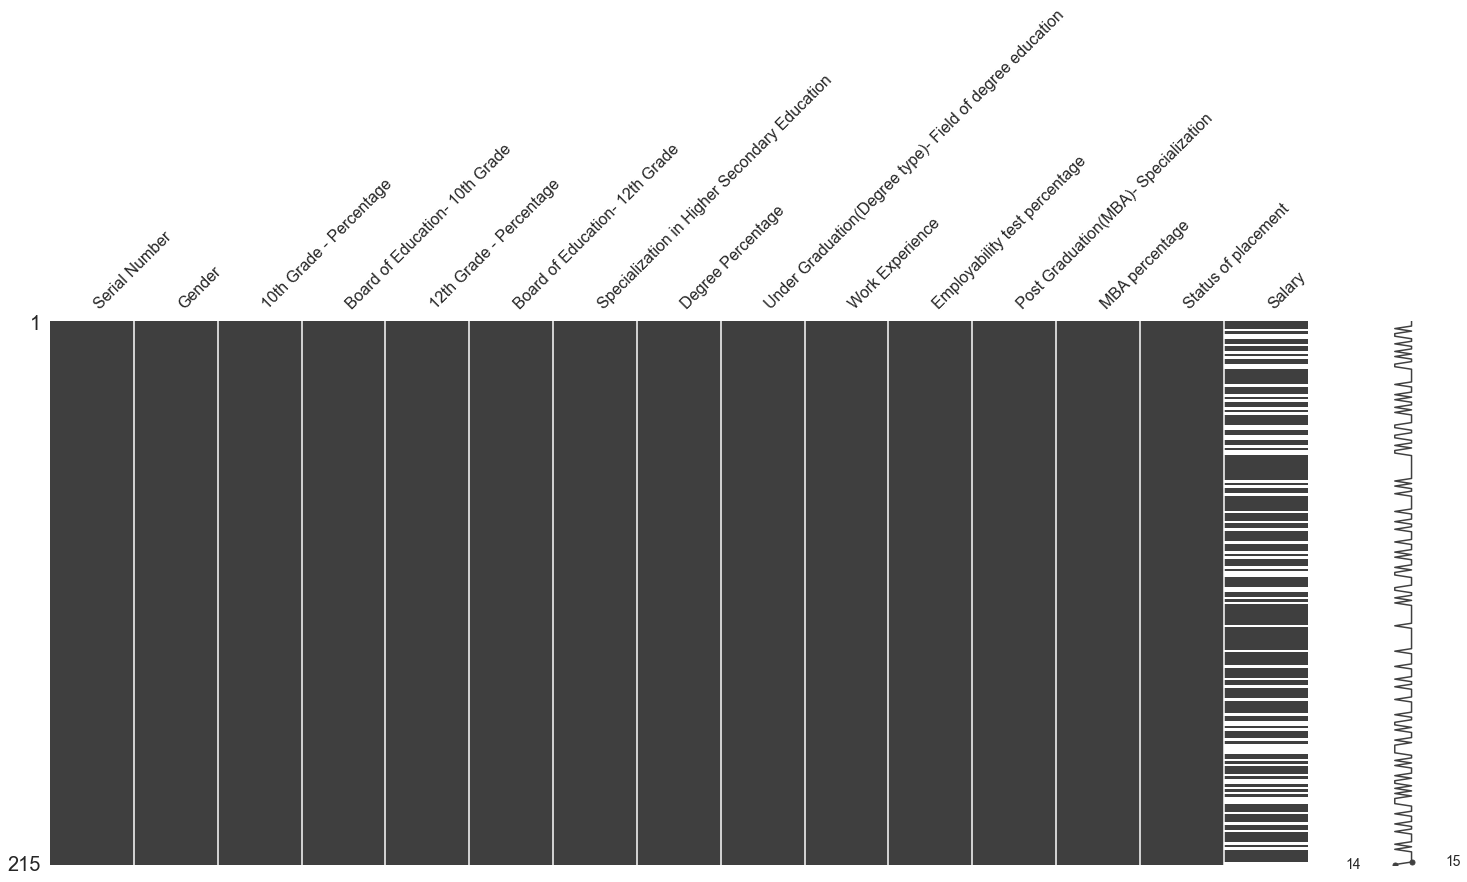

In [17]:
import missingno as msno 
msno.matrix(Placement);

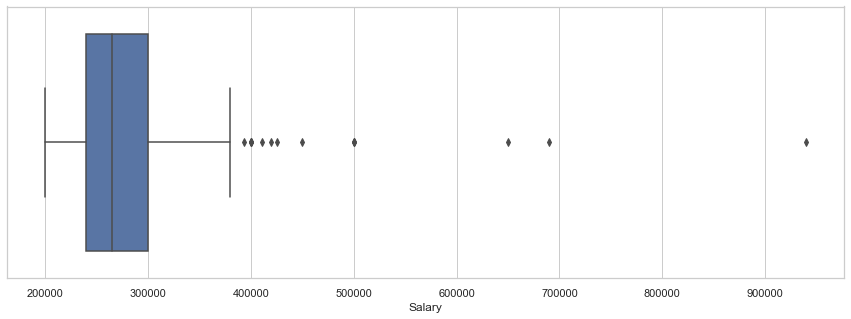

In [18]:
#displaying boxplot in order to find the correct value or method to fill the 67 missing values.

plt.figure(figsize =(15, 5))
sns.boxplot(Placement['Salary']);

### Filling missing values

In [19]:
#filling missing values '0' for those who aren't hired.

Placement.Salary.fillna(value=0, inplace = True)

In [20]:
Placement.isnull().sum()

Serial Number                                               0
Gender                                                      0
10th Grade - Percentage                                     0
Board of Education- 10th Grade                              0
12th Grade - Percentage                                     0
Board of Education- 12th Grade                              0
Specialization in Higher Secondary Education                0
Degree Percentage                                           0
Under Graduation(Degree type)- Field of degree education    0
Work Experience                                             0
Employability test percentage                               0
Post Graduation(MBA)- Specialization                        0
MBA percentage                                              0
Status of placement                                         0
Salary                                                      0
dtype: int64

### Solution for Problem Statement:

#### Does Gender affect placement ?

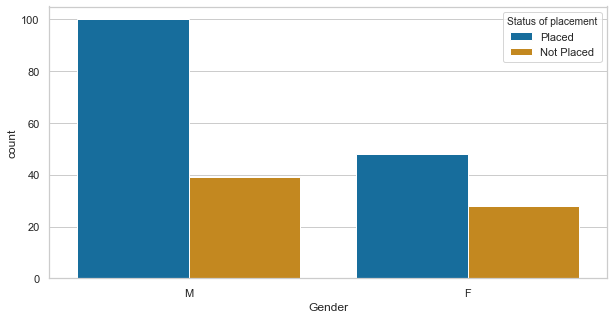

In [21]:
plt.figure(figsize =(10, 5))
sns.countplot(Placement["Gender"], hue=Placement["Status of placement"], palette='colorblind');

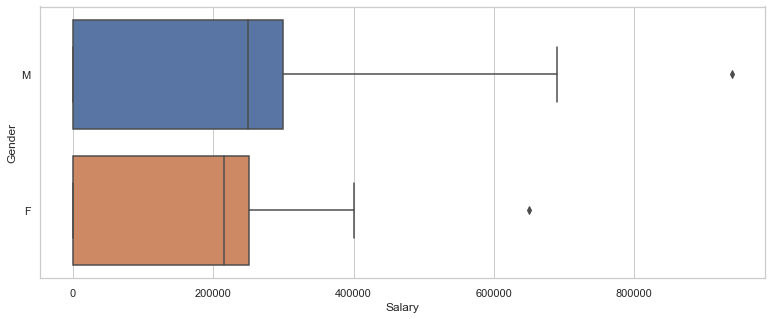

In [22]:
plt.figure(figsize =(13, 5))
sns.boxplot("Salary", "Gender", data=Placement);

In [23]:
pd.pivot_table(Placement, values='Salary', index=['Gender'],
                columns=['Status of placement'], aggfunc='count')

Status of placement,Not Placed,Placed
Gender,,
F,28,48
M,39,100


###### Insights:
~ The number of male candidates being placed is higher than that of the female candidates, but it is due to the difference in data for male and female.

~ Even though the placement differs with gender, there isn't much change in Salary. The average salary of male candidates are slightly higher than the Female Candidate with few males getting extremely high salary.

=========================================================================================================================

#### Does Secondary Education Percentage and Board affect the Placement ?

##### Percentage:

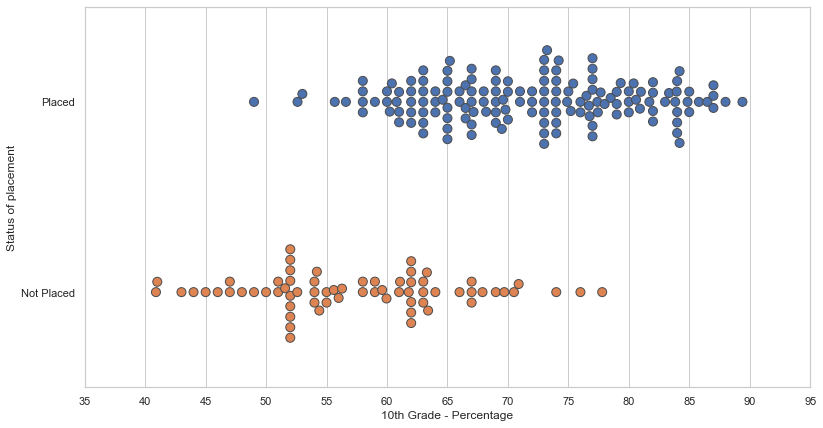

In [24]:
plt.figure(figsize =(13, 7))
sns.swarmplot(x=Placement['10th Grade - Percentage'], y=Placement['Status of placement'], size=9, linewidth=1)
plt.xticks(np.arange(35, 100, 5));

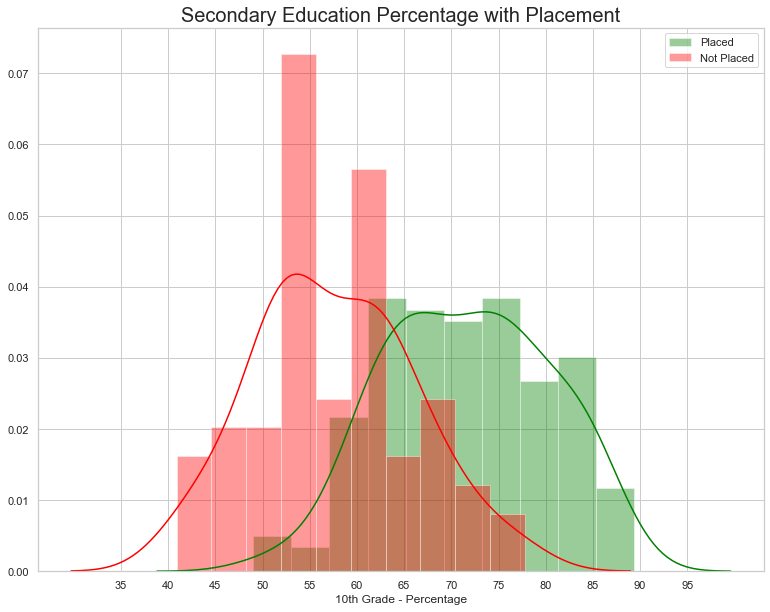

In [25]:
plt.figure(figsize =(13, 10))
sns.distplot(Placement['10th Grade - Percentage'] [ Placement['Status of placement']=="Placed"], bins=10,color='green' )
sns.distplot(Placement['10th Grade - Percentage'] [ Placement['Status of placement']=="Not Placed"], bins=10, color='red' )
plt.xticks(np.arange(35, 100, 5))
plt.legend(["Placed", "Not Placed"])
plt.title("Secondary Education Percentage with Placement",  fontsize=20);

###### Insights:
~ Candidates scoring more than 80% in their SSC has 100% placement

~ Candidates scoring less than 55% are likely to be not placed.

~ Candidates with scores between 65% to 80% are placed on an average.

##### Boards:

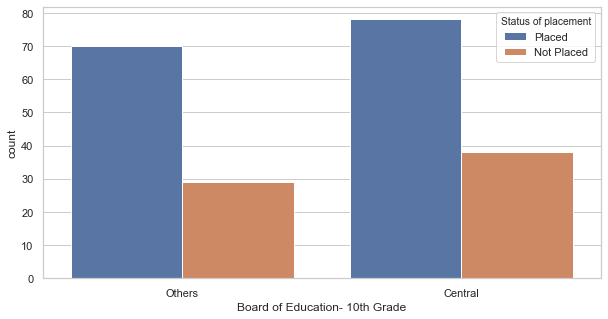

In [26]:
plt.figure(figsize =(10, 5))
sns.countplot("Board of Education- 10th Grade", hue="Status of placement", data=Placement);

##### Insights:

~ Board of Education in 10th Grade doesn't affect the placement much.

=========================================================================================================================

#### Does Higher Secondary Education Percentage, Board and Specialization affect the Placement ?

##### Percentage

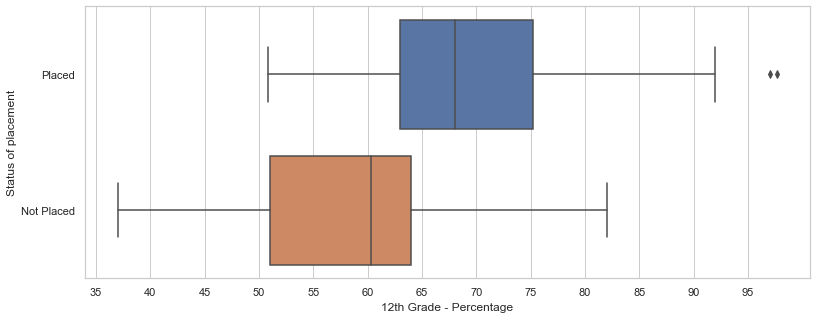

In [27]:
plt.figure(figsize =(13,5))
sns.boxplot("12th Grade - Percentage", "Status of placement", data=Placement)
plt.xticks(np.arange(35, 100, 5));

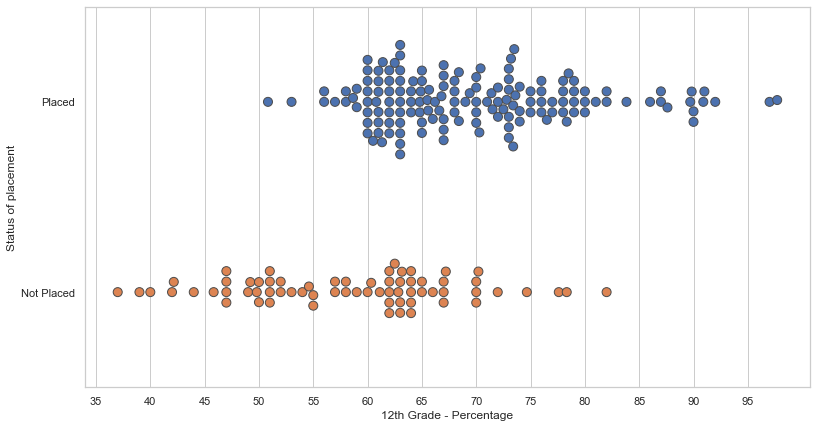

In [28]:
plt.figure(figsize =(13, 7))
sns.swarmplot(x=Placement['12th Grade - Percentage'], y=Placement['Status of placement'], size=9, linewidth=1)
plt.xticks(np.arange(35, 100, 5));

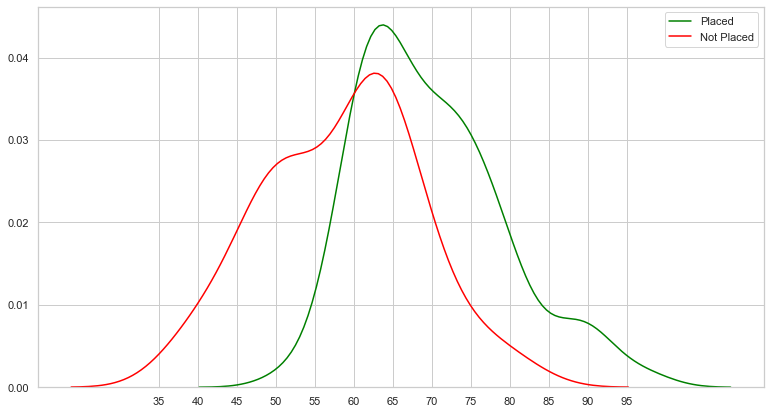

In [29]:
plt.figure(figsize =(13, 7))
sns.kdeplot(Placement['12th Grade - Percentage'] [ Placement['Status of placement']=="Placed"], color='green' )
sns.kdeplot(Placement['12th Grade - Percentage'] [ Placement['Status of placement']=="Not Placed"], color='red' )
plt.xticks(np.arange(35, 100, 5))
plt.legend(["Placed", "Not Placed"]);

###### Insights:

~ Candidates scoring more than 83% in their HSC has 100% placement

~ Candidates scoring less than 50% are likely to be not placed.

~ Candidates with scores between 60% to 80% are placed on an average.

##### Boards

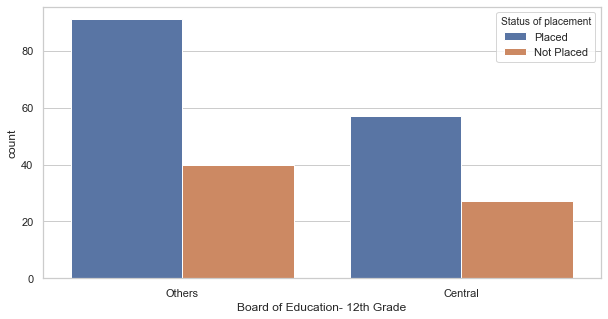

In [30]:
plt.figure(figsize =(10, 5))
sns.countplot("Board of Education- 12th Grade", hue="Status of placement", data=Placement);

###### Insights:

~  Board of Education in 12th Grade doesn't affect the placement much.

##### Specialization

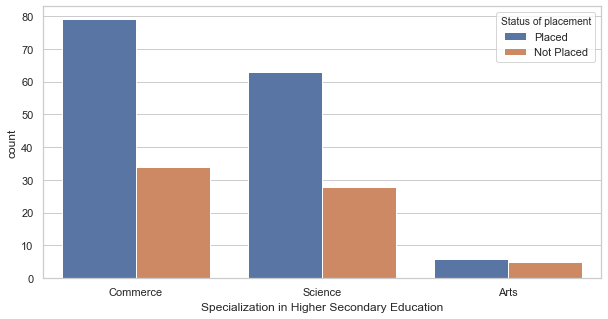

In [31]:
plt.figure(figsize =(10, 5))
sns.countplot("Specialization in Higher Secondary Education", hue="Status of placement", data=Placement);

###### Insights:

~ Commerce Students are getting placed at a higher rate than Science students.

~ Arts students are less in number and has a 50-50 chances of getting placed and not placed.

=========================================================================================================================

#### Does Degree Percentage and Field of Degree Education affect the Placement?

##### Degree Percentage

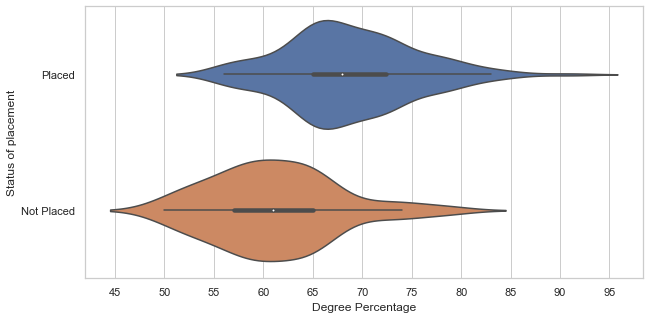

In [32]:
plt.figure(figsize =(10, 5))
sns.violinplot(x='Degree Percentage', y='Status of placement', data=Placement)
plt.xticks(np.arange(45, 100, 5));

###### Insights:

~ Minimun percentage for placement is 55%.

~ 100% Placement for students scoring above 80%

~ Students scoring above 65% have high chances of getting placed.

##### Field of Degree Education

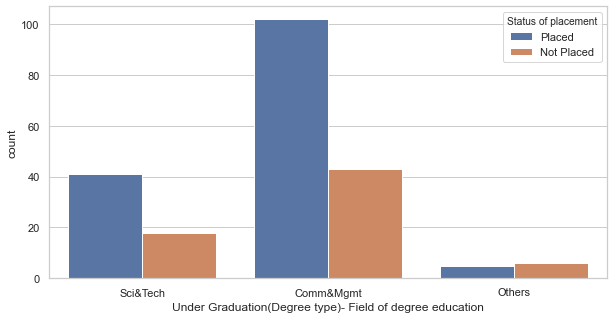

In [33]:
plt.figure(figsize =(10, 5))
sns.countplot("Under Graduation(Degree type)- Field of degree education", hue="Status of placement", data=Placement);

###### Insights:

~ Commerce & Management department are having good placement record.

~ Science & Technology department has 2:1 ratio of getting placed and unplaced.

~ Very less students with "Others" as their department, therefore we can't make inferences out of it.

=========================================================================================================================

#### Does Work Experience affect the Placement?

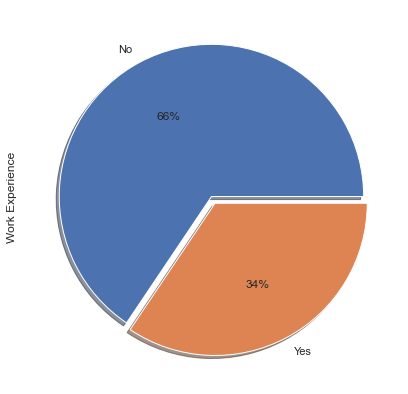

In [34]:
plt.figure(figsize =(7,7))
Placement['Work Experience'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.0f%%', shadow=True);

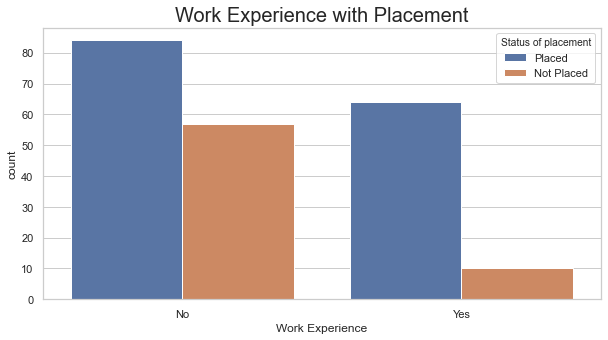

In [35]:
plt.figure(figsize =(10, 5))
sns.countplot("Work Experience", hue="Status of placement", data=Placement)
plt.title(label='Work Experience with Placement', fontsize=20);

###### Insights:

~ Out of the total candidates, only 34% have work experience and 66% doesn't hold any work experience.

~ Candidates with 'No work experience' has got placed more than the candidates with work experience.

~ But among the candidates with work experience, they have a very low chance of not getting placed.

=========================================================================================================================

#### Does Employability test percentage  affect the Placement?

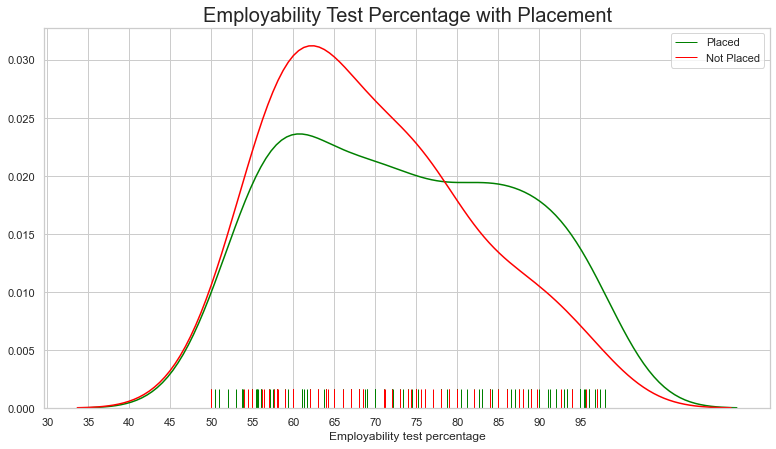

In [36]:
plt.figure(figsize =(13, 7))
sns.distplot(Placement['Employability test percentage'] [ Placement['Status of placement']=="Placed"], color='green',hist=False, rug=True )
sns.distplot(Placement['Employability test percentage'] [ Placement['Status of placement']=="Not Placed"], color='red', hist=False, rug=True )
plt.xticks(np.arange(30, 100, 5))
plt.legend(["Placed", "Not Placed"])
plt.title("Employability Test Percentage with Placement",  fontsize=20);

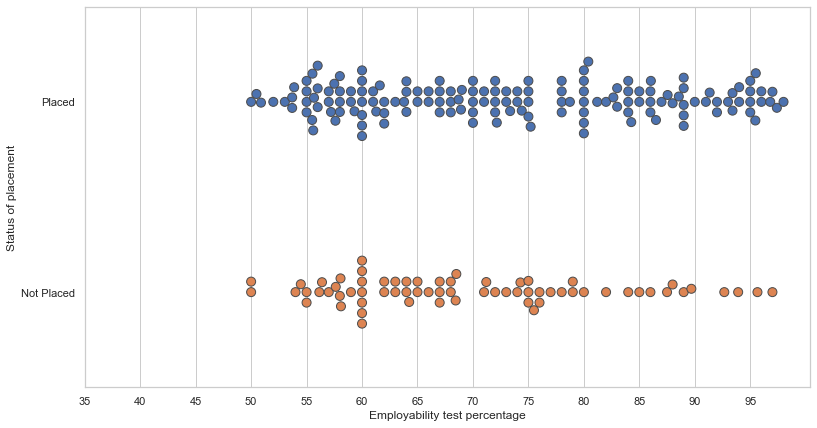

In [37]:
plt.figure(figsize =(13, 7))
sns.swarmplot(x=Placement['Employability test percentage'], y=Placement['Status of placement'], size=9, linewidth=1)
plt.xticks(np.arange(35, 100, 5));

###### Insights:

~ Data points are highly overlapping, hence this feature does not affect placement.

~ Yet, there is a considerable amount of students getting placed wit percentage above 80%.

=========================================================================================================================

#### Does Post Graduation(MBA)- Specialization affect placement ?

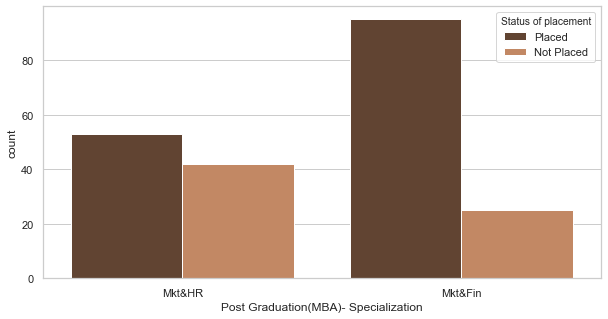

In [38]:
plt.figure(figsize =(10, 5))
sns.countplot("Post Graduation(MBA)- Specialization", hue="Status of placement", data=Placement, palette="copper")
plt.show()

###### Insights:

~ Candidates choosing Marketing & Finance has higher rate of getting placed as there are only few candidates getting rejected.

~ Candidates with Marketing & HR has equal chance of getting placed and unplaced.

=========================================================================================================================

#### Does MBA Percentage affects Placement ?

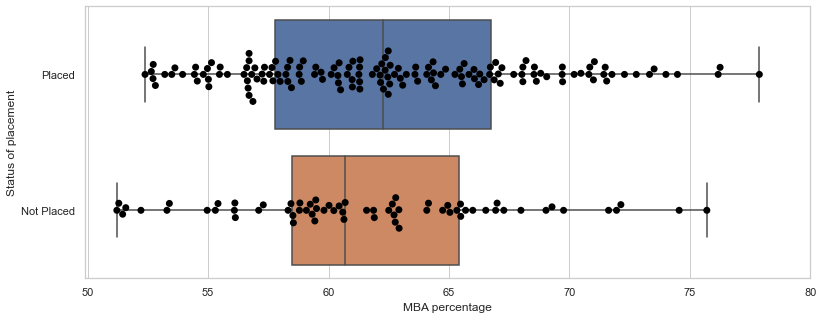

In [39]:
plt.figure(figsize=(13,5))
sns.boxplot(y = "Status of placement",x = 'MBA percentage',data = Placement, whis=np.inf)
sns.swarmplot(y = "Status of placement",x = 'MBA percentage',data = Placement, size = 7,color = 'black')
plt.xticks(np.arange(50, 85, 5))
plt.show()

###### Insights:

~ No pattern can be identified by MBA Percentage, thus MBA Percentage doesn't affect Placement.

### Conclusion:

Here are my conclusions drawn from the analysis performed:

Based on our analysis on the Recruitment Dataset, Gender doesn't dominate the placement to a larger extent yet it does make an impact on salary at a very low level.

Upon exploring the educational percentages of the candidates, the candidates with 80% in their 10th and 12th Grade has got higher plausibility of getting placed. The percentage of candidates seems to be normally distributed.
Both the board students (10th & 12th) are getting placed, therefore taking up Central Board or other boards doesn't strike the placement of a student significantly.

Moving on to the UG Degree of a candidate, he/she must at least be gaining 55% in their respective UG Degree to have a run at the placement. At an average, Candidates with percentage above 65 has fair chance of geting placed. Candidates with 80% own huge opportunity in placement.
Approximately 2:1 - placed,unplaced ratio prevails in the department of Commerce & Management,  Science & Technology. We've fewer candidates with 'Others' as their field of degree education, therefore we can't make a bonafide inference out of it.

Candidates with work experience is 34% and without work experience is 66% which confers that there is class imbalancing in the data and this feature does influence placement at micro-level. Candidates with work experience has shallow rejection rate in contrast with candidates with No work experience.

The employability test percentage can't produce valid arguement as it is immensely superposed, yet there is noticeable amount of students getting placed with percentage above 80%.

Post Graduation (MBA) program embodies two specializations i.e., Marketing & Finance, Marketing & HR. Out of the two specialization, dismissal proportion of candidates in Marketing & Finance is at ground-level. Marketing & HR has balanced play in winning placement.
With regard to percentage in MBA, no pattern can be recognized as the data points doesn't project anything extensible.

Hence, Corporate companies can acquire candidates by bringing the above analysis into play.